## **Practical No 5: Big Mart Sales Analysis**

## **Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## **Importing Dataset in dataframes**

In [ ]:
train=pd.read_csv("/content/drive/MyDrive/Supermart-Sales-Prediction-master/dataset/Train.csv")
test=pd.read_csv("/content/drive/MyDrive/Supermart-Sales-Prediction-master/dataset/Test.csv")

In [ ]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [ ]:
# Knowing the Shape of datasets
print("Train Dataset Shape: ", train.shape)
print("Test Dataset Shape: ", test.shape)

Train Dataset Shape:  (8523, 12)
Test Dataset Shape:  (5681, 11)


In [ ]:
# Knowing the null values present in the dataset
print("Train Dataset Report")
print(train.isnull().sum())
print("\nTest Dataset Report")
test.isnull().sum()

Train Dataset Report
Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Test Dataset Report


Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [ ]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


<ipython-input-8-87a95e33f8a7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correl=train.corr()


<Axes: >

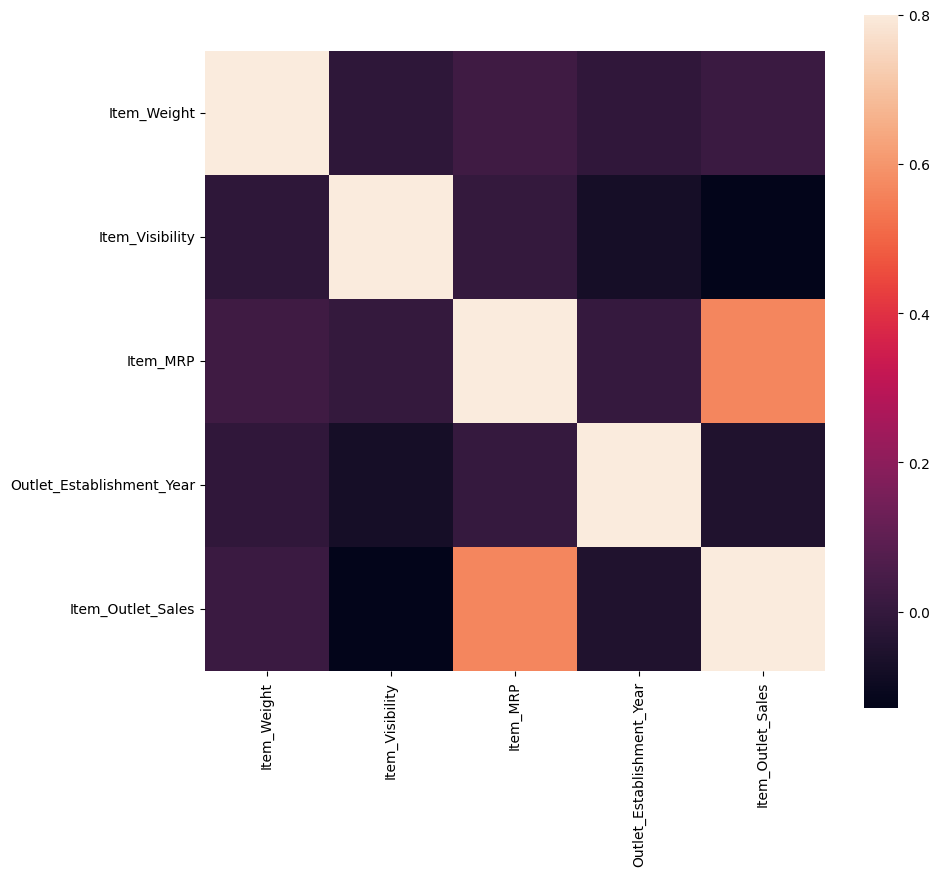

In [ ]:
#now plot correlation matrix
correl=train.corr()
ax=plt.subplots(figsize=(10,9))
sns.heatmap(correl,vmax=0.8,square=True)

In [ ]:
# To optimize the data, we need to find all value counts for the attributes
listm = ["Item_Fat_Content", "Item_Type", "Outlet_Identifier", "Outlet_Size", "Outlet_Location_Type", "Outlet_Type"]
for i in listm:
  print(f"Value count for {i}")
  # print(train.i.value_counts())
  print(train[i].value_counts(),"\n")

Value count for Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64 

Value count for Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64 

Value count for Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64 

Value count for Outlet_Size
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtyp

<Axes: >

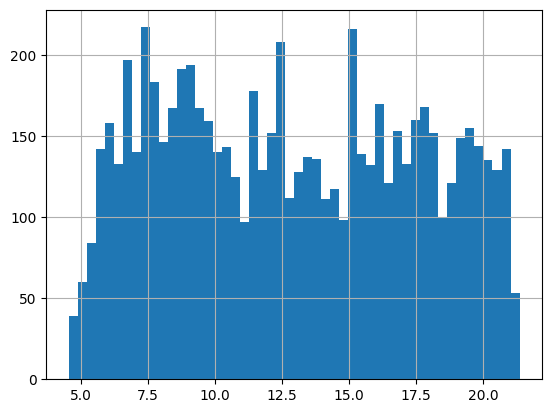

In [ ]:
train.Item_Weight.hist(bins=50)

<Axes: >

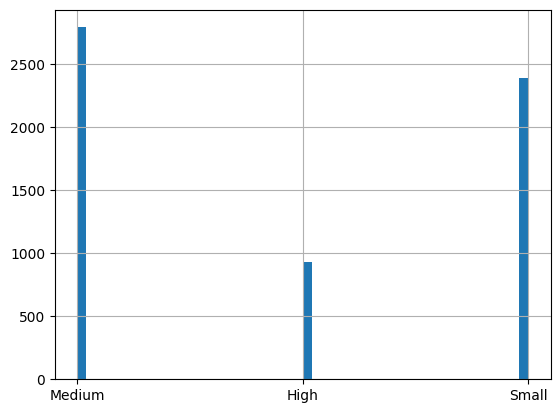

In [ ]:
train.Outlet_Size.hist(bins=50)

In [ ]:
Item_Sales=train.Item_Outlet_Sales
data=train.append(test)
print(data.shape)

(14204, 12)


<ipython-input-12-4f35841c36fe>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data=train.append(test)


In [ ]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

<ipython-input-14-82e8f027f233>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=data.corr()


<Axes: >

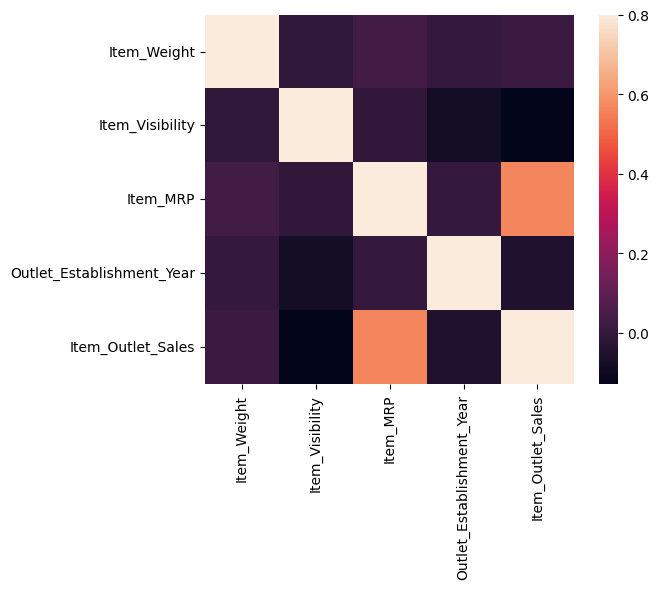

In [ ]:
correlation=data.corr()
sns.heatmap(correlation,vmax=.8,square=True)

In [ ]:
data.apply(lambda x:len(x.unique()))

Item_Identifier               1559
Item_Weight                    416
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      4
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3494
dtype: int64

In [ ]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [ ]:
data.dtypes.index

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [ ]:
categorical_columns=[x for x in data.dtypes.index if data.dtypes[x]=='object']
print(categorical_columns)
categorical_columns=[x for x in categorical_columns if x not in ['Item_Identifier','Outlet_Identifier']] # For removing this attributes
print(categorical_columns)

['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


In [ ]:
#print frequencies of these categories
for col in categorical_columns:
    print('Frequency of categories for variable')
    print(data[col].value_counts(), "\n")

Frequency of categories for variable
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64 

Frequency of categories for variable
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64 

Frequency of categories for variable
Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64 

Frequency of categories for variable
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64 

Frequency of categories for variable
Supermarket Type1

In [ ]:
data.Item_Weight.fillna(data.Item_Weight.mean(),inplace=True)

In [ ]:
# Importing necessary function
from scipy.stats import mode

# Mapping Outlet_Size to numerical values
data['Outlet_Size'] = data['Outlet_Size'].map({'Small': 0, 'Medium': 1, 'High': 2})

# Determining the mode of Outlet_Size for each Outlet_Type
outlet_size_mode = data.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=lambda x: mode(x))

# Finding missing values in Outlet_Size
miss_bool = data['Outlet_Size'].isnull()

# Filling missing values in Outlet_Size with mode values based on Outlet_Type
data.loc[miss_bool, 'Outlet_Size'] = data.loc[miss_bool, 'Outlet_Type'].apply(lambda x: outlet_size_mode[x])


In [ ]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [ ]:
for i in data.dtypes.index:
    if len(data[i].value_counts())<30:
        print(i,"\n",data[i].value_counts())

Item_Fat_Content 
 Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64
Item_Type 
 Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64
Outlet_Identifier 
 OUT027    1559
OUT013    1553
OUT049    1550
OUT046    1550
OUT035    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64
Outlet_Establishment_Year 
 1985    2439
1987    1553
1999    1550
1997    1550
2004    1550
2002    1548
2009    1546
2007    1543
19

In [ ]:
data.pivot_table(index='Outlet_Type',values='Item_Outlet_Sales')

,Item_Outlet_Sales
Outlet_Type,
Grocery Store,339.828500
Supermarket Type1,2316.181148
Supermarket Type2,1995.498739
Supermarket Type3,3694.038558


Mean of Item Visibility 0.06595278007399324


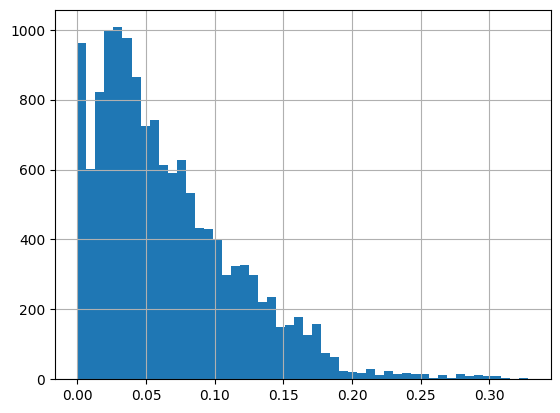

In [ ]:
data.Item_Visibility.hist(bins=50)
print ("Mean of Item Visibility", data.Item_Visibility.mean())
data.loc[data['Item_Visibility']==0,'Item_Visibility']=data.Item_Visibility.mean()

In [ ]:
data.Item_Type.value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

In [ ]:
data['Item_Type_Combined']=data.Item_Identifier.apply(lambda x:x[0:2])
data['Item_Type_Combined'].value_counts()

FD    10201
NC     2686
DR     1317
Name: Item_Type_Combined, dtype: int64

In [ ]:
data['Item_Type_Combined']=data.Item_Type_Combined.map({'FD':'Food and Drinks','NC':'Non-Consumable','DR':'Drinks'})

In [ ]:
data['Item_Type_Combined'].value_counts()

Food and Drinks    10201
Non-Consumable      2686
Drinks              1317
Name: Item_Type_Combined, dtype: int64

In [ ]:
data['Outlet_Years']=2013-data['Outlet_Establishment_Year']
data['Outlet_Years'].describe()

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_Years, dtype: float64

In [ ]:
data.Item_Fat_Content.value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [ ]:
data.Item_Fat_Content=data.Item_Fat_Content.replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})
data.Item_Fat_Content.value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [ ]:
data.loc[data['Item_Type_Combined']=='Non-Consumable','Item_Fat_Content']='Non-Edible'

In [ ]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Combined,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,1.0,Tier 1,Supermarket Type1,3735.1380,Food and Drinks,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,1.0,Tier 3,Supermarket Type2,443.4228,Drinks,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,1.0,Tier 1,Supermarket Type1,2097.2700,Food and Drinks,14
3,FDX07,19.20,Regular,0.065953,Fruits and Vegetables,182.0950,OUT010,1998,"(nan, 925)",Tier 3,Grocery Store,732.3800,Food and Drinks,15
4,NCD19,8.93,Non-Edible,0.065953,Household,53.8614,OUT013,1987,2.0,Tier 3,Supermarket Type1,994.7052,Non-Consumable,26


## **Performing Label Encoding for Categorical attributes**

In [ ]:
#import library
#now import labelEncoding

from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
lb = LabelEncoder()

# Columns to be label encoded
var = ['Item_Fat_Content', 'Outlet_Location_Type', 'Outlet_Type',  'Item_Type_Combined']

# Label encode each column
for item in var:
    data[item] = lb.fit_transform(data[item])

In [ ]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Combined,Outlet_Years,Outlet
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1.0,0,1,3735.1380,1,14,9
1,DRC01,5.92,2,0.019278,Soft Drinks,48.2692,OUT018,2009,1.0,2,2,443.4228,0,4,3
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1.0,0,1,2097.2700,1,14,9
3,FDX07,19.20,2,0.065953,Fruits and Vegetables,182.0950,OUT010,1998,"(nan, 925)",2,0,732.3800,1,15,0
4,NCD19,8.93,1,0.065953,Household,53.8614,OUT013,1987,2.0,2,1,994.7052,2,26,1


In [ ]:
data.drop(['Outlet_Establishment_Year','Item_Type'],inplace=True,axis=1)

In [ ]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Combined,Outlet_Years,Outlet
0,FDA15,9.30,0,0.016047,249.8092,OUT049,1.0,0,1,3735.1380,1,14,9
1,DRC01,5.92,2,0.019278,48.2692,OUT018,1.0,2,2,443.4228,0,4,3
2,FDN15,17.50,0,0.016760,141.6180,OUT049,1.0,0,1,2097.2700,1,14,9
3,FDX07,19.20,2,0.065953,182.0950,OUT010,"(nan, 925)",2,0,732.3800,1,15,0
4,NCD19,8.93,1,0.065953,53.8614,OUT013,2.0,2,1,994.7052,2,26,1


In [ ]:
Item_Sales=data.Item_Outlet_Sales
train=data.iloc[:8523,:]
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Combined,Outlet_Years,Outlet
0,FDA15,9.30,0,0.016047,249.8092,OUT049,1.0,0,1,3735.1380,1,14,9
1,DRC01,5.92,2,0.019278,48.2692,OUT018,1.0,2,2,443.4228,0,4,3
2,FDN15,17.50,0,0.016760,141.6180,OUT049,1.0,0,1,2097.2700,1,14,9
3,FDX07,19.20,2,0.065953,182.0950,OUT010,"(nan, 925)",2,0,732.3800,1,15,0
4,NCD19,8.93,1,0.065953,53.8614,OUT013,2.0,2,1,994.7052,2,26,1


In [ ]:
test=data.iloc[8523:,:]
test.drop('Item_Outlet_Sales',inplace=True,axis=1)

<ipython-input-42-1322c9c0ccb6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop('Item_Outlet_Sales',inplace=True,axis=1)


In [ ]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_Combined,Outlet_Years,Outlet
0,FDW58,20.750000,0,0.007565,107.8622,OUT049,1.0,0,1,1,14,9
1,FDW14,8.300000,2,0.038428,87.3198,OUT017,"(0.0, 3100)",1,1,1,6,2
2,NCN55,14.600000,1,0.099575,241.7538,OUT010,"(nan, 925)",2,0,2,15,0
3,FDQ58,7.315000,0,0.015388,155.0340,OUT017,"(0.0, 3100)",1,1,1,6,2
4,FDY38,12.792854,2,0.118599,234.2300,OUT027,1.0,2,3,1,28,5


In [ ]:
def modelfit(alg, dtrain, dtest, predictor, target, IDcol, filename=""):
    alg.fit(dtrain[predictor], dtrain[target])
    prediction = alg.predict(dtrain[predictor])

    # Check data types
    print("Data type of dtrain[target]:", type(dtrain[target]))
    print("Data type of prediction:", type(prediction))

    # now cross_validation
    cv_score = model_selection.cross_val_score(alg, dtrain[predictor], dtrain[target], cv=20, scoring='neg_mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))
    print(np.sqrt(metrics.mean_squared_error(dtrain[target].values, prediction)))
    print("CV_SCORE : mean - %.4g | std - %.4g | max - %.4g | min - %.4g" % (np.mean(cv_score), np.std(cv_score), np.max(cv_score), np.min(cv_score)))

    dtest[target] = alg.predict(dtest[predictor])  # Update this line

    # now export on submission file
    IDcol.append(target)
    submission = pd.DataFrame({x: dtest[x] for x in IDcol})
    submission.to_csv("/content/drive/MyDrive/Supermart-Sales-Prediction-master/" + filename, index=False)


## **Performing the Linear Regression on it**

In [ ]:
#Linear Regression on training set
from sklearn.linear_model import LinearRegression , Ridge,Lasso
predictor=[x for x in train.columns if x not in [target] + IDcol]
alg1=LinearRegression()
modelfit(alg1,train,test,predictor,target,IDcol,"alg1.csv")

ValueError: setting an array element with a sequence.

In [ ]:
predictors = [x for x in train.columns if x not in [target]+IDcol]
alg2 = Ridge(alpha=0.05,normalize=True)
modelfit(alg2, train, test, predictors, target, IDcol, 'alg2.csv')
coef2 = pd.Series(alg2.coef_, predictors).sort_values()
coef2.plot(kind='bar', title='Model Coefficients')

TypeError: Ridge.__init__() got an unexpected keyword argument 'normalize'

In [ ]:
from sklearn.tree import DecisionTreeRegressor
predictors = [x for x in train.columns if x not in [target]+IDcol]
alg3 = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
modelfit(alg3, train, test, predictors, target, IDcol, 'alg3.csv')
coef3 = pd.Series(alg3.feature_importances_, predictors).sort_values(ascending=False)
coef3.plot(kind='bar', title='Feature Importances')

ValueError: setting an array element with a sequence.

Data type of dtrain[target]: <class 'pandas.core.series.Series'>
Data type of prediction: <class 'numpy.ndarray'>
1070.1302266626528
CV_SCORE : mean - 1097 | std - 43.03 | max - 1174 | min - 1027


<ipython-input-50-cd46f8fd6ba9>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dtest[target] = alg.predict(dtest[predictor])  # Update this line


<Axes: title={'center': 'Feature Importances'}>

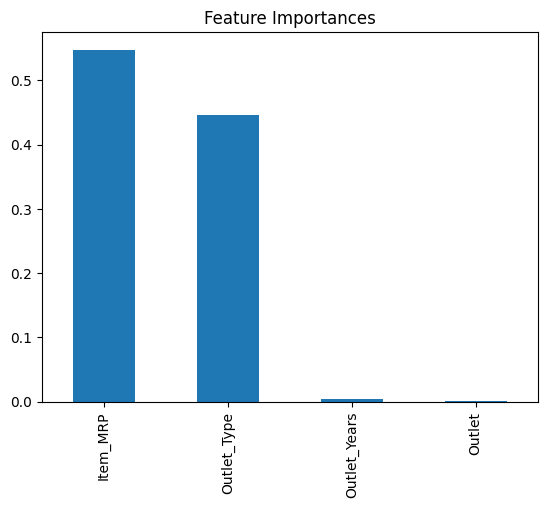

In [ ]:
predictors = ['Item_MRP','Outlet_Type','Outlet','Outlet_Years']
alg4 = DecisionTreeRegressor(max_depth=8, min_samples_leaf=150)
modelfit(alg4, train, test, predictors, target, IDcol, 'alg4.csv')
coef4 = pd.Series(alg4.feature_importances_, predictors).sort_values(ascending=False)
coef4.plot(kind='bar', title='Feature Importances')